# Project: Predicting Conversion in E-commerce Data
# Name: Shaohua Dong
# Unique name: shaohua

In [120]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

conversion=pd.read_csv("conversion_data.csv")
conversion.head(5)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


## Check if there is missing data

In [3]:
conversion.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

### There is no missing data in this data set.

# Question 1. What is the conversion rates for each access method in each country?

## (a). Make an aggregate table of conversion rates by access method and by country.

In [4]:
table_conversion = pd.pivot_table(conversion, values=['converted'],index=['country'],columns=['source'],aggfunc='mean',margins=False)
table_conversion

converted                    
source        Ads    Direct       Seo
country                              
China    0.001484  0.001374  0.001224
Germany  0.066755  0.053422  0.064055
UK       0.055630  0.046267  0.053905
US       0.040580  0.032909  0.038508

### The table shows that China has the lowest conversion rates among the four countries. People accessed by direct search have the slightly low conversion rates than people accessed by advertisement and search engine recommendation.

## (b). Make a pivot table of conversion rates by access method and by country.

Text(0.5,1,'Conversion Rates by Access Method and by Country')

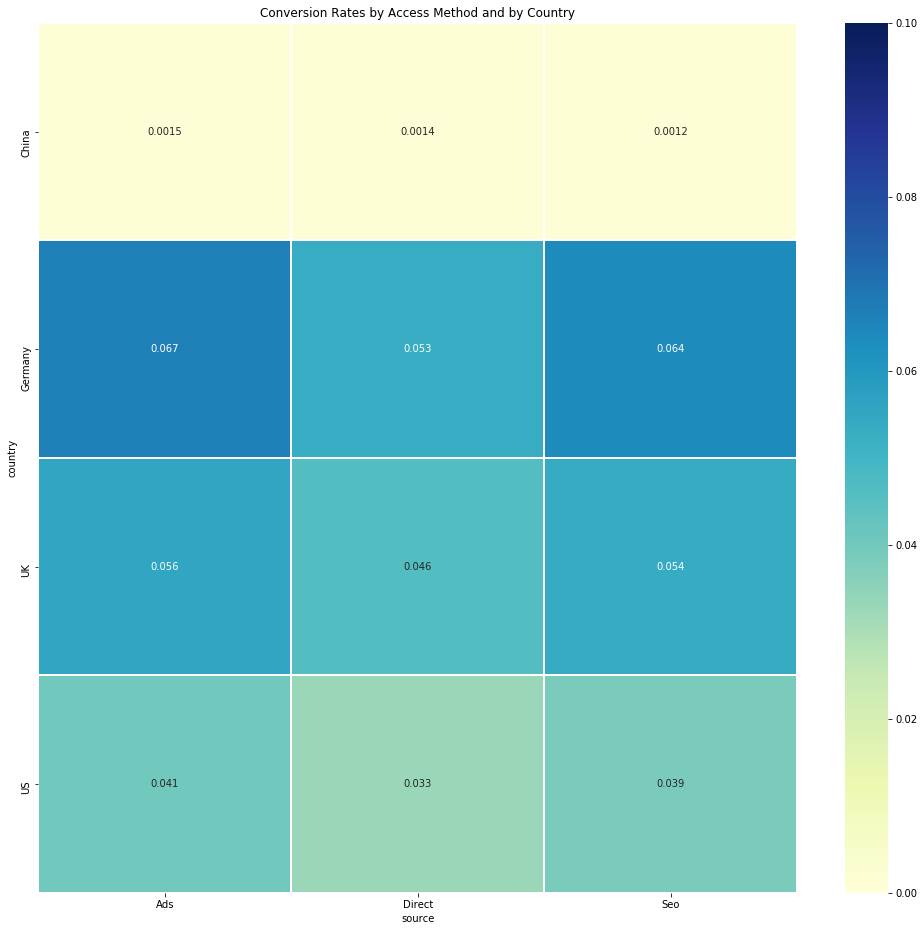

In [5]:
plt.figure(figsize=(17,16))
sns.heatmap(table_conversion['converted'], linewidths=1,annot=True,vmin=0,vmax=0.1,cmap='YlGnBu')
plt.title("Conversion Rates by Access Method and by Country")

### The result from the plot is consistent with the aggregate table.

# Question 2. Are website activities different among three access methods? 

### Before doing the analysis, I will first remove outliers since they may bias the result. Outliers are defined as the numbers beyond the interval, [mean-4\*sd, mean+4\*sd], where sd is the standard deviation of the number of pages visited using the three access methods.

In [208]:
conversion_ads = conversion[conversion["source"]=="Ads"]["total_pages_visited"]
conversion_Direct = conversion[conversion["source"]=="Direct"]["total_pages_visited"]
conversion_Seo = conversion[conversion["source"]=="Seo"]["total_pages_visited"]

In [209]:
ads_mean=conversion_ads.mean()
ads_sd=conversion_ads.std()

Direct_mean=conversion_Direct.mean()
Direct_sd=conversion_Direct.std()

Seo_mean=conversion_Seo.mean()
Seo_sd=conversion_Seo.std()

conversion_ads = conversion[(conversion["source"]=="Ads") & (conversion["total_pages_visited"]<(ads_mean+ads_sd*4)) & (conversion["total_pages_visited"]>(ads_mean-ads_sd*4))]
conversion_Direct = conversion[(conversion["source"]=="Direct") & (conversion["total_pages_visited"]<(Direct_mean+Direct_sd*4)) & (conversion["total_pages_visited"]>(Direct_mean-Direct_sd*4))]
conversion_Seo = conversion[(conversion["source"]=="Seo") & (conversion["total_pages_visited"]<(Seo_mean+Seo_sd*4)) & (conversion["total_pages_visited"]>(Seo_mean-Seo_sd*4))]

conversion_web=pd.concat([conversion_ads, conversion_Direct, conversion_Seo])

## (a). Calculate the average website activities for three access methods. Use one-way ANOVA to examine whether the differences are significant.

In [160]:
conversion_web.groupby("source")["total_pages_visited"].mean()

source
Ads       4.807304
Direct    4.716216
Seo       4.801439
Name: total_pages_visited, dtype: float64

### People who came from advertisement have the most website activities, while people from direct search have the least website activities.

In [161]:
conversion_ads_p=conversion_ads["total_pages_visited"]
conversion_Direct_p=conversion_Direct["total_pages_visited"]
conversion_Seo_p=conversion_Seo["total_pages_visited"]

stats.f_oneway(conversion_ads_p, conversion_Direct_p, conversion_Seo_p) 

F_onewayResult(statistic=21.671679388034043, pvalue=3.8793410476483701e-10)

### There is a significant difference in website activities among the three access methods. Let's see where the difference comes from specifically.

In [162]:
stats.ttest_ind(conversion_ads_p, conversion_Direct_p)

Ttest_indResult(statistic=5.820923178397333, pvalue=5.863454909125437e-09)

In [163]:
stats.ttest_ind(conversion_ads_p, conversion_Seo_p)

Ttest_indResult(statistic=0.44002355614702371, pvalue=0.65992043865607064)

In [164]:
stats.ttest_ind(conversion_Direct_p, conversion_Seo_p)

Ttest_indResult(statistic=-6.0540139135191104, pvalue=1.4150165166004204e-09)

### T-tests show that there is a significant difference in website activities between direct search and search engine recommendation and between direct search and advertisement. But there is no difference between advertisement and search engine recommendation.

### In sum, people accessed by direct search have significantly less website activities than people accessed by search engine recommendation and people accessed by advertisement; people accessed by advertisement have no difference in website activities from people accessed by search engine recommendation.

## (b). Make the boxplots of activities by three access methods.

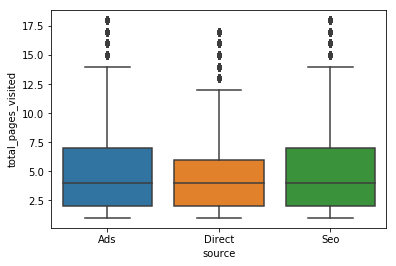

In [157]:
sns.boxplot(data=conversion_web, x="source", y="total_pages_visited")

### The boxplots show that people accessed by direct search generally have less website activities than people accessed by advertisement and search engine recommendation, which is consistent with the analysis result.

# Question 3. For each website access method, how different is it between converted users and non-converted users in terms of age, user types (new or repeated), and website activity?

### Before doing the analysis, I will still remove the outliers that may bias the result. In the previous question, I have removed outliers of the number of pages visited. Now I also want to remove the outliers of age. Outliers are still defined as the numbers beyond the interval, [mean-6\*sd, mean+6\*sd].

In [210]:
ads_mean2=conversion_ads["age"].mean()
ads_sd2=conversion_ads["age"].std()

Direct_mean2=conversion_Direct["age"].mean()
Direct_sd2=conversion_Direct["age"].std()

Seo_mean2=conversion_Seo["age"].mean()
Seo_sd2=conversion_Seo["age"].std()

conversion_ads = conversion_web[(conversion_web["source"]=="Ads") & (conversion_web["age"]<(ads_mean2+ads_sd2*6)) & (conversion_web["age"]>(ads_mean2-ads_sd2*6))]
conversion_Direct = conversion_web[(conversion_web["source"]=="Direct") & (conversion_web["age"]<(Direct_mean2+Direct_sd2*6)) & (conversion_web["age"]>(Direct_mean2-Direct_sd2*6))]
conversion_Seo = conversion_web[(conversion_web["source"]=="Seo") & (conversion_web["age"]<(Seo_mean2+Seo_sd2*6)) & (conversion_web["age"]>(Seo_mean2-Seo_sd2*6))]

conversion_web=pd.concat([conversion_ads, conversion_Direct, conversion_Seo])


## (a). For each website access method, group the data by conversion type and calculate the differences between the two types in terms of age, rate of new users, and activity. Use t test for age and activity and chi-square test for user type to examine the differences.

In [211]:
# Age

age_pivoted = conversion_web.pivot_table(index = "source",
                                          columns = "converted",
                                          values = "age",
                                          aggfunc = "mean")
age_pivoted["diff"]=age_pivoted[1]-age_pivoted[0]
age_pivoted["abs diff"]=(age_pivoted[1]-age_pivoted[0]).abs()
age_pivoted

converted,0,1,diff,abs diff
source,,,,
Ads,30.677988,26.531287,-4.146701,4.146701
Direct,30.681568,26.690932,-3.990635,3.990635
Seo,30.728987,26.475991,-4.252997,4.252997


In [212]:
# User type

new_pivoted = conversion_web.pivot_table(index = "source",
                                          columns = "converted",
                                          values = "new_user",
                                          aggfunc = "mean")
new_pivoted["diff"]=new_pivoted[1]-new_pivoted[0]
new_pivoted["abs diff"]=(new_pivoted[1]-new_pivoted[0]).abs()
new_pivoted

converted,0,1,diff,abs diff
source,,,,
Ads,0.699977,0.281385,-0.418591,0.418591
Direct,0.697468,0.325670,-0.371797,0.371797
Seo,0.697887,0.291375,-0.406512,0.406512


In [213]:
# Website activities

page_pivoted = conversion_web.pivot_table(index = "source",
                                          columns = "converted",
                                          values = "total_pages_visited",
                                          aggfunc = "mean")
page_pivoted["diff"]=page_pivoted[1]-page_pivoted[0]
page_pivoted["abs diff"]=(page_pivoted[1]-page_pivoted[0]).abs()
page_pivoted

converted,0,1,diff,abs diff
source,,,,
Ads,4.551646,13.425817,8.874171,8.874171
Direct,4.533762,12.915709,8.381947,8.381947
Seo,4.556305,13.366434,8.810129,8.810129


### According to the tables, the non-converters are generally older, more new users, and have less website activities than converters.

### Next, I will use t test and chi-square test to investigate the differences between two conversion types in those variables for each of three access methods.

In [214]:
# Age - Advertisement

stats.ttest_ind(conversion_web[(conversion_web["source"]=="Ads") & (conversion_web["converted"]==0)]["age"],
               conversion_web[(conversion_web["source"]=="Ads") & (conversion_web["converted"]==1)]["age"])

Ttest_indResult(statistic=25.100786557212359, pvalue=1.4991387299285716e-138)

In [215]:
# Age - Direct search

stats.ttest_ind(conversion_web[(conversion_web["source"]=="Direct") & (conversion_web["converted"]==0)]["age"],
               conversion_web[(conversion_web["source"]=="Direct") & (conversion_web["converted"]==1)]["age"])

Ttest_indResult(statistic=18.923966458395466, pvalue=1.131626806891408e-79)

In [216]:
# Age - Search engine recommendation

stats.ttest_ind(conversion_web[(conversion_web["source"]=="Seo") & (conversion_web["converted"]==0)]["age"],
               conversion_web[(conversion_web["source"]=="Seo") & (conversion_web["converted"]==1)]["age"])

Ttest_indResult(statistic=33.264374675858797, pvalue=9.1523040676500367e-242)

In [217]:
# User type - Advertisement
m1=pd.crosstab(conversion_ads['converted'], conversion_ads['new_user'])

chi2, p, dof, ex = chi2_contingency(m1)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  2012.18723448
p-val =  0.0
degree of freedom =  1


In [218]:
# User type - Direct search
m2=pd.crosstab(conversion_Direct['converted'], conversion_Direct['new_user'])

chi2, p, dof, ex = chi2_contingency(m2)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  987.16908951
p-val =  1.10474314866e-216
degree of freedom =  1


In [219]:
# User type - Search engine recommendation

m3=pd.crosstab(conversion_Seo['converted'], conversion_Seo['new_user'])

chi2, p, dof, ex = chi2_contingency(m3)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  3200.93694761
p-val =  0.0
degree of freedom =  1


In [220]:
# Website activities - Advertisement

stats.ttest_ind(conversion_web[(conversion_web["source"]=="Ads") & (conversion_web["converted"]==0)]["total_pages_visited"],
               conversion_web[(conversion_web["source"]=="Ads") & (conversion_web["converted"]==1)]["total_pages_visited"])

Ttest_indResult(statistic=-157.41433852255477, pvalue=0.0)

In [221]:
# Website activities - Direct search

stats.ttest_ind(conversion_web[(conversion_web["source"]=="Direct") & (conversion_web["converted"]==0)]["total_pages_visited"],
               conversion_web[(conversion_web["source"]=="Direct") & (conversion_web["converted"]==1)]["total_pages_visited"])

Ttest_indResult(statistic=-117.55689835161211, pvalue=0.0)

In [222]:
# Website activities - Search engine recommendation

stats.ttest_ind(conversion_web[(conversion_web["source"]=="Seo") & (conversion_web["converted"]==0)]["total_pages_visited"],
               conversion_web[(conversion_web["source"]=="Seo") & (conversion_web["converted"]==1)]["total_pages_visited"])

Ttest_indResult(statistic=-203.37992774520609, pvalue=0.0)

### According to the t test and chi square test, non-converters and converters have the difference in age, user type, and website activities in all three access methods. In other words, non-converters are significantly older, more new users, and have less website activities than converters in all three access methods.


## (b). For each website access method, make the boxplots of age and activity for each conversion type separately; make bar charts of user type for each conversion type separately.

Text(0.5,0,'Seo')

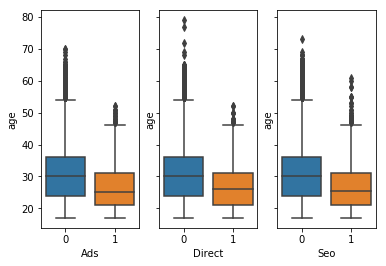

In [228]:
# Age
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
sns.boxplot(data=conversion_ads, x="converted", y="age", ax=ax1)
sns.boxplot(data=conversion_Direct, x="converted", y="age", ax=ax2)
sns.boxplot(data=conversion_Seo, x="converted", y="age", ax=ax3)
ax1.set_xlabel('Ads')
ax2.set_xlabel('Direct')
ax3.set_xlabel('Seo')

Text(0.5,0,'Seo')

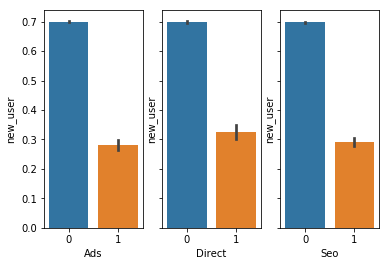

In [230]:
# User type
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
sns.barplot(data=conversion_ads, x="converted", y="new_user", ax=ax1)
sns.barplot(data=conversion_Direct, x="converted", y="new_user", ax=ax2)
sns.barplot(data=conversion_Seo, x="converted", y="new_user", ax=ax3)
ax1.set_xlabel('Ads')
ax2.set_xlabel('Direct')
ax3.set_xlabel('Seo')

Text(0.5,0,'Seo')

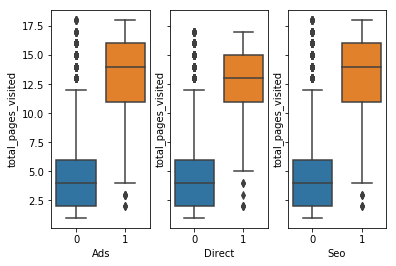

In [229]:
# Website activities
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
sns.boxplot(data=conversion_ads, x="converted", y="total_pages_visited", ax=ax1)
sns.boxplot(data=conversion_Direct, x="converted", y="total_pages_visited", ax=ax2)
sns.boxplot(data=conversion_Seo, x="converted", y="total_pages_visited", ax=ax3)
ax1.set_xlabel('Ads')
ax2.set_xlabel('Direct')
ax3.set_xlabel('Seo')

### According to the plots, non-converters are significantly older, more new users, and have less website activities than converters in all three access methods, which is consistent with the analysis result

# Question 4. How can we use this data set to predict whether a user will be converted?

## Solution: (a). Use various machine learning techniques, such as classification trees, random forest, support vector machine, and gradient boosting. See which technique has the best performance. The predictors are country, age, whether the user is a new user or repeated user, website access method, and the number of pages visited during that session.

### I will use three types of machine learning techniques to predict conversion: classification tree, random forest, and gradient boosting. I will use cross validation (cv=5) to do all the models. I use data from previous steps where outliers of number of pages visited and age have been removed.

In [288]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [258]:
# Convert two categorical variables to numeric
conversion_web["country"] = conversion_web["country"].astype('category')
conversion_web["source"] = conversion_web["source"].astype('category')
conversion_web["country_cat"] = conversion_web["country"].cat.codes
conversion_web["source_cat"] = conversion_web["source"].cat.codes

In [259]:
x = conversion_web[["age","new_user","total_pages_visited","country_cat","source_cat"]]
y = conversion_web[["converted"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1234) # Spilt data into 75% and 25% as train and test data set

In [325]:
# Classification tree

param ={"max_depth":range(2,5), "min_impurity_decrease":[0.1, 0.01, 0.001]}


clf_gini = GridSearchCV(tree.DecisionTreeClassifier(criterion = "gini", random_state = 100), param, cv=5)
clf_gini.fit(x_train, y_train)
print("The best accuracy score of training data set is ",clf_gini.best_score_)
print("The parameter of the best model is ",clf_gini.best_params_)
y_pre_c = clf_gini.predict(x_test)
accuracy_classif = accuracy_score(y_test, y_pre_c)
print("The accuracy score of test data set is ",accuracy_classif)

The best accuracy score of training data set is  0.983319903304
The parameter of the best model is  {'max_depth': 3, 'min_impurity_decrease': 0.001}
The accuracy score of test data set is  0.984630456633


In [285]:
# Random Forest

param = {"n_estimators":[10, 50, 100]}

rf = GridSearchCV(RandomForestClassifier(criterion = "gini", max_depth = 3, min_impurity_decrease = 0.001, 
                                         random_state = 100), param, cv=5)
rf.fit(x_train, y_train.values.ravel())
print("The best accuracy score of training data set is ",rf.best_score_)
print("The parameter of the best model is ",rf.best_params_)
y_pre_r = rf.predict(x_test) 
accuracy_rf = accuracy_score(y_test, y_pre_r)
print("The accuracy score of test data set is ",accuracy_rf)

The best accuracy score of training data set is  0.973349166631
The parameter of the best model is  {'n_estimators': 10}
The accuracy score of test data set is  0.97311602224


In [292]:
# Gradient Boosting

param = {"n_estimators":[10, 50, 100], "learning_rate":[0.1, 0.2]}

gb = GridSearchCV(GradientBoostingClassifier(max_depth = 3, min_impurity_decrease = 0.001, 
                                         random_state = 100), param, cv=5)
gb.fit(x_train, y_train.values.ravel())
print("The best accuracy score of training data set is ",gb.best_score_)
print("The parameter of the best model is ",gb.best_params_)
y_pre_g = gb.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pre_g)
print("The accuracy score of test data set is ",accuracy_gb)

The best accuracy score of training data set is  0.985957843844
The parameter of the best model is  {'learning_rate': 0.2, 'n_estimators': 100}
The accuracy score of test data set is  0.986119063069


### All three techniques have very high accuracy scores for both training data set and test data set, indicating all the models have good ability to predict conversion. Gradient boosting has the highest accuracy score for test data set, while random forest has the lowest score among the three models.

## (b). After conducting machine learning models, plot the confusion_matrix for the three models. Plot ROC curves of all the models to see which technique has the best performance.

In [317]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

Text(0.5,1,'Classification Tree')

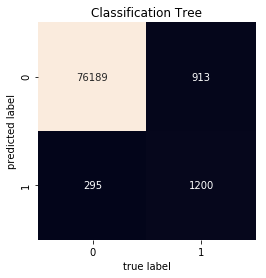

In [327]:
# Classification Tree

clf_con = confusion_matrix(y_test, y_pre_c)
sns.heatmap(clf_con.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Classification Tree")

Text(0.5,1,'Random Forest')

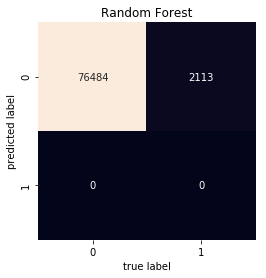

In [326]:
# Random Forest

rf_con = confusion_matrix(y_test, y_pre_r)
sns.heatmap(rf_con.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Random Forest")

Text(0.5,1,'Gradient Boosting')

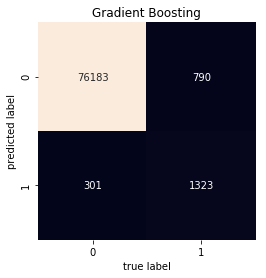

In [323]:
# Gradient Boosting

gb_con = confusion_matrix(y_test, y_pre_g)
sns.heatmap(gb_con.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Gradient Boosting")

### Both Classification Tree and Gradient Boosting have good predictive ability for converters and non-converters, while Random Forest has good ability for predicting non-converters but bad ability for predicting converters.

In [300]:
clf_probas_ = clf_gini.fit(x_train, y_train).predict_proba(x_test)[:, 1]
fpr_clf, tpr_clf, _ = roc_curve(y_test, clf_probas_)

rf_probas_ = rf.fit(x_train, y_train.values.ravel()).predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probas_)

gb_probas_ = gb.fit(x_train, y_train.values.ravel()).predict_proba(x_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probas_)

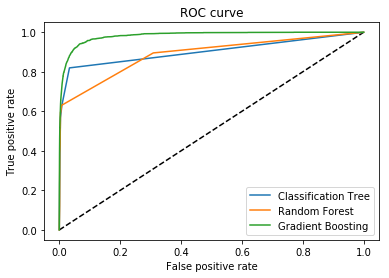

In [301]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_clf, tpr_clf, label='Classification Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### The ROC curve plot shows the consistent result with accuracy scores, where Gradient Boosting has the highest prediction power and Random Forest has the lowest prediction power.

# End of Project